<a href="https://colab.research.google.com/github/Kavya-sree/PyTorch-Tutorials/blob/main/pytorch_transforms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Which is more important: Good data or Good model?**

Definitely, good data is more important than good models. The quality of a Machine Learning model is greatly inspired by the quality of the dataset it was trained on. But most often good data is not readily available. You always have to work on your data to make it good.

Thus data transformation is an integral step before model building. PyTorch's `torchvision` package has a `transforms` module for preprocessing and transforming image. 

Data transformation is mostly done in image data.

**Why do we need Data Transformations?**

Data transformation means changing the data from its original form. Transformations can deal with changes in geometry, color of images and so on. We might need to transform the data to convert it into a form that is ready to be fed into a machine learning model as well as for getting better features for modelling. Another need for data transformation is **data augmentation**.

**Data augmentation** is a set of techniques of modifying or augmenting a dataset to create new ones while retaining original data. This is done by making small changes to data or using deep learning models to generate new data points.

#Transforms
The `torchvision.transforms` module provides various image transformations. These image transformations can be chained together using `Compose`.

Most transform classes have a function equivalent: functional transforms give fine-grained control over the transformations. This is useful if you have to build a more complex transformation pipeline 

Most transformations accept both PIL images and tensor images. Some transformations are PIL-only and some are tensor-only. The Conversion may be used to convert to and from PIL images, or for converting dtypes and ranges.

The transformations that accept tensor images also accept batches of tensor images. A Tensor Image is a tensor with (C, H, W) shape, where C is a number of channels, H and W are image height and width. A batch of Tensor Images is a tensor of (B, C, H, W) shape, where B is a number of images in the batch.

The expected range of the values of a tensor image is implicitly defined by the tensor dtype. Tensor images with a float dtype are expected to have values in [0, 1). Tensor images with an integer dtype are expected to have values in [0, MAX_DTYPE] where MAX_DTYPE is the largest value that can be represented in that dtype.

Randomized transformations will apply the same transformation to all the images of a given batch, but they will produce different transformations across calls. For reproducible transformations across calls, you may use functional transforms.

Let’s look at a few of them:


#Import
-> Import the required library/ package/ module 

-> Read the image

In [ ]:
import torchvision
import torchvision.transforms.functional as TF
from torchvision import transforms
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np
  
# read an image

image = Image.open(r"/content/flower.jpg")

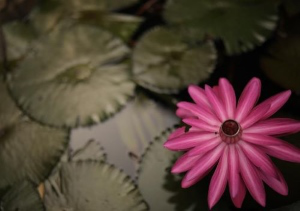

In [ ]:
image.show()

In [ ]:
print(image.size) # here the size is a sequence like (width, height)

(300, 211)


#Geometry 

**Resize**

size is a sequence like (height, width)

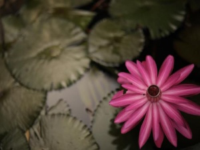

In [ ]:
transform = transforms.Resize((150,200), max_size=None, antialias='warn')
resized_image = transform(image)
resized_image.show()

**RandomCrop**

Crop the given image at a random location

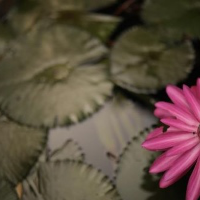

In [ ]:
transform = transforms.RandomCrop(200, padding=None, pad_if_needed=False, fill=0, padding_mode='constant')
randomcrop_image = transform(image)
randomcrop_image.show()

**RandomResizedCrop**

Crop a random portion of image and resize it to a given size.



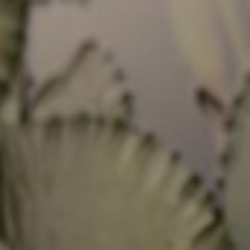

In [ ]:
transform = transforms.RandomResizedCrop(250, scale=(0.08, 1.0), ratio=(0.75, 1.3333333333333333))
RandomResizedCrop_image = transform(image)
RandomResizedCrop_image.show()

**CenterCrop**

Crops the given image at the center.

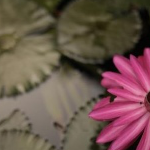

In [ ]:
transform = transforms.CenterCrop((150,150))
CenterCrop_image = transform(image)
CenterCrop_image.show()

**RandomRotation**

Rotate the image by angle.

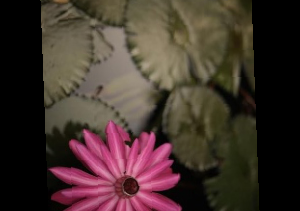

In [ ]:
transform = transforms.RandomRotation(90)
RandomRotation_image = transform(image)
RandomRotation_image.show()

**RandomHorizontalFlip**

Horizontally flip the given image randomly with a given probability.

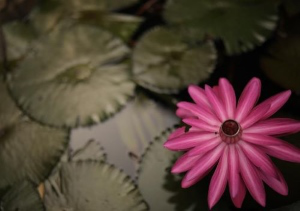

In [ ]:
transform = transforms.RandomHorizontalFlip(p=0.5)
RandomHorizontalFlip_image = transform(image)
RandomHorizontalFlip_image.show()

**RandomVerticalFlip**

Vertically flip the given image randomly with a given probability.

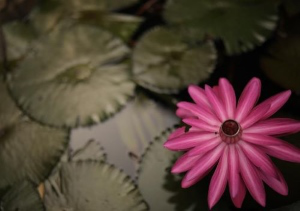

In [ ]:
transform = transforms.RandomVerticalFlip(p=0.5)
RandomVerticalFlip_image = transform(image)
RandomVerticalFlip_image.show()

# Color

**ColorJitter**

Randomly change the brightness, contrast, saturation and hue of an image.

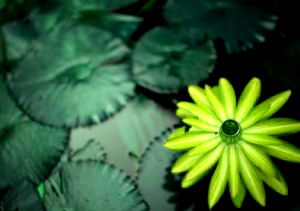

In [ ]:
transform = transforms.ColorJitter(brightness=(0.5,1.5), contrast=(0.4), saturation=(0.5,1.5), hue=(0.3))
ColorJitter_image = transform(image)
ColorJitter_image.show()

**Grayscale**

Convert image into grayscale. You can provide how many channels you want as input to the parameter “num_output_channels”.

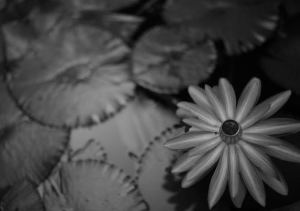

In [ ]:
transform = transforms.Grayscale(num_output_channels=1)
grayscale_image = transform(image)
grayscale_image.show()

** Guassian Blur**

Blurs image with randomly chosen Gaussian blur.

`kernel_size` (int or sequence) – Size of the Gaussian kernel.

`sigma` (float or tuple of python:float (min, max)) – Standard deviation to be used for creating kernel to perform blurring. If float, sigma is fixed. If it is tuple of float (min, max), sigma is chosen uniformly at random to lie in the given range.

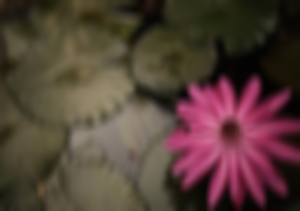

In [ ]:
transform = transforms.GaussianBlur(kernel_size=(7, 13), sigma=(5, 10))
GaussianBlur_image = transform(image)
GaussianBlur_image.show()

# Composition

**compose**

Composes several transforms together. This transform does not support torchscript. Instead of implementing successive transformations manually on the input image, we could chain the transformations together.

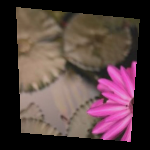

In [ ]:
transform = transforms.Compose([transforms.CenterCrop((150,150)),
                              transforms.ColorJitter(brightness=(0.5,1.5), contrast=(0.4), saturation=(0.5,1.5), hue=(0.3)),
                              transforms.RandomPerspective(distortion_scale=0.4)
                              ])
compose_image = transform(image)
compose_image

**RandomApply**

Apply randomly a list of transformations with a given probability.

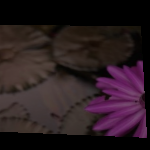

In [ ]:
transform = transforms.RandomApply([transforms.CenterCrop((150,150)),
                              transforms.ColorJitter(brightness=(0.5,1.5), contrast=(0.4), saturation=(0.5,1.5), hue=(0.3)),
                              transforms.RandomPerspective(distortion_scale=0.4)],
                              p=0.7)
RandomApply_image = transform(image)
RandomApply_image

**RandomChoice**

Apply single transformation randomly picked from a list. 

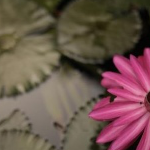

In [ ]:
transform = transforms.RandomChoice([transforms.CenterCrop((150,150)),
                              transforms.ColorJitter(brightness=(0.5,1.5), contrast=(0.4), saturation=(0.5,1.5), hue=(0.3)),
                              transforms.RandomPerspective(distortion_scale=0.4)],
                              p=(0.3, 0.3, 0.3))
RandomChoice_image = transform(image)
RandomChoice_image

**RandomOrder**

Apply a list of transformations in a random order

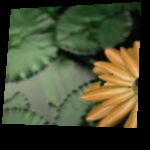

In [ ]:
transform = transforms.RandomOrder([transforms.CenterCrop((150,150)),
                              transforms.ColorJitter(brightness=(0.5,1.5), contrast=(0.4), saturation=(0.5,1.5), hue=(0.3)),
                              transforms.RandomPerspective(distortion_scale=0.4)]
                              )
RandomOrder_image = transform(image)
RandomOrder_image

#Miscellaneous

**ToTensor**

Convert a PIL Image or ndarray to tensor and scale the values accordingly. Converts a PIL Image or numpy.ndarray (H x W x C) in the range [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0] 

Text(0.5, 1.0, 'distribution of pixels')

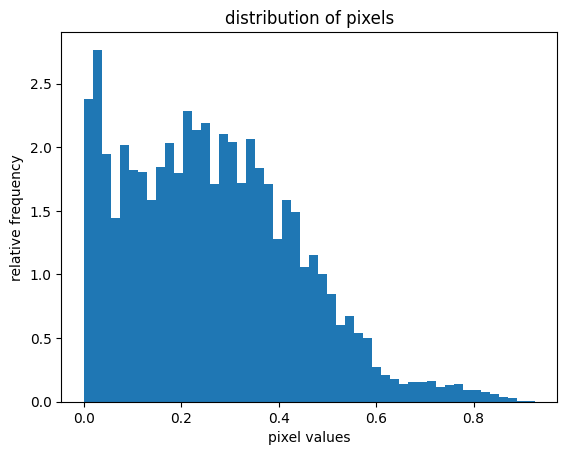

In [ ]:
transform = torchvision.transforms.ToTensor()
Tensor_image = transform(image)

#Plot pixel distribution of tensor image
plt.hist(np.array(Tensor_image).ravel(), bins=50, density=True);
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("distribution of pixels")

we can see that the pixel values range from [0.0, 1.0]

**Normalizing Images**

Normalize a tensor image with mean and standard deviation.

Image normalization changes the range of pixel intensity values of an input image. The colored images have pixel values between 0 and 255 for all three channels. But models (including neural networks) prefer floating point values within a smaller range. 
Lets take a look at the distribution of pixel values of our original image:

Text(0.5, 1.0, 'distribution of pixels')

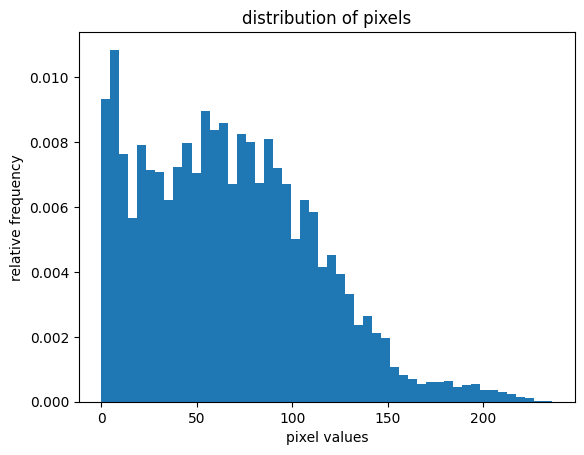

In [ ]:
plt.hist(np.array(image).ravel(), bins=50, density=True);
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("distribution of pixels")

We can see the pixel values range from 0 to 255

Now lets normalize the image. First convert the image into a Tensor. Then normalize.

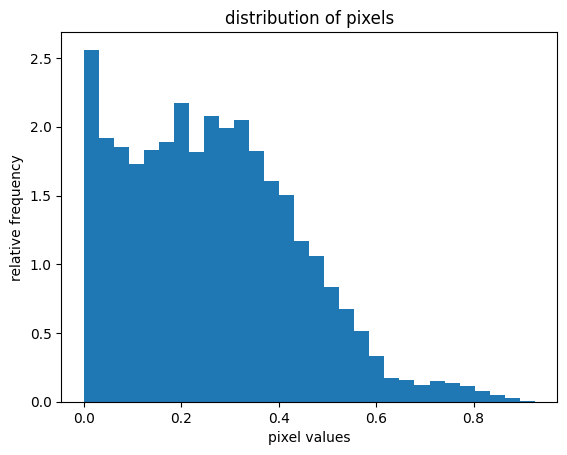

In [ ]:
#normalize image to [-1,1] range
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    #torchvision.transforms.Normalize(
        #mean=[0.5, 0.5, 0.5],
        #std=[0.5, 0.5, 0.5]
    #)
])
normalized_image = transform(image) 

# plot pixel distribution of normalized image
plt.hist(normalized_image.numpy().ravel(), bins=30, density=True)
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("distribution of pixels");

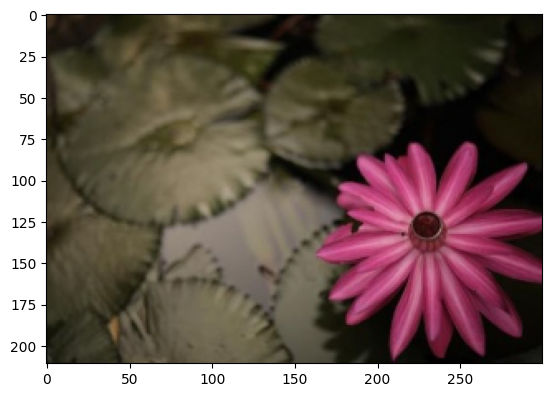

In [ ]:
plt.imshow(normalized_image.permute(1, 2, 0))
plt.show()

# Functional Transforms

All the transformations till now have the parameters generated randomly. Functional transformations do not use a random number generator for their parameters thus gives you fine-grained control of the transformation pipeline. So we need to manually specify or generate all the parameters, but the functional transform will give you reproducible results across calls.

All the functional transforms can be accessed from `torchvision.transforms.functional`.

For more details check PyTorch official doc:
https://pytorch.org/vision/stable/transforms.html#functional-transforms

Lets see some Functional transform:

**adjust_brightness**

Adjust brightness of an image.


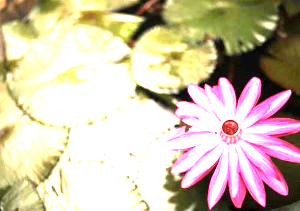

In [ ]:
adjust_brightness_image = TF.adjust_brightness(image,brightness_factor=4)
adjust_brightness_image.show()

**adjust_contrast**

Adjust contrast of an image.

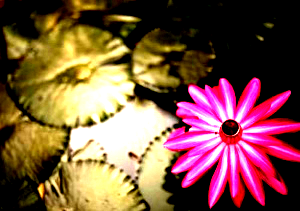

In [ ]:
adjust_contrast_image = TF.adjust_contrast(image,contrast_factor=4.5)
adjust_contrast_image

**adjust_gamma**

Perform gamma correction on an image.

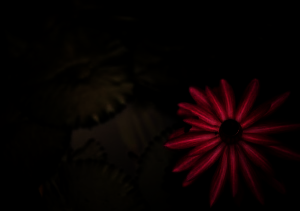

In [ ]:
adjust_gamma_image = TF.adjust_gamma(image,gamma=4.5)
adjust_gamma_image

**adjust_hue**

Adjust hue of an image.

The image hue is adjusted by converting the image to HSV and cyclically shifting the intensities in the hue channel (H). The image is then converted back to original image mode.

hue_factor is the amount of shift in H channel and must be in the interval [-0.5, 0.5].

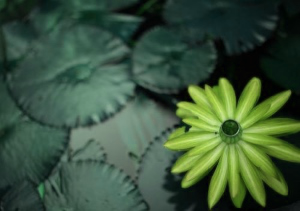

In [ ]:
adjust_hue_image = TF.adjust_hue(image, hue_factor= 0.3)
adjust_hue_image

**adjust_saturation**

Adjust color saturation of an image.

`saturation_factor` (float) – How much to adjust the saturation. 0 will give a black and white image, 1 will give the original image while 2 will enhance the saturation by a factor of 2.

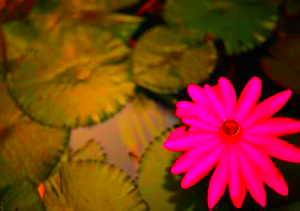

In [ ]:
adjust_saturation_image = TF.adjust_saturation(image,saturation_factor=6)
adjust_saturation_image

**adjust_sharpness**

Adjust the sharpness of an image.

`sharpness_factor` (float) – How much to adjust the sharpness. Can be any non-negative number. 0 gives a blurred image, 1 gives the original image while 2 increases the sharpness by a factor of 2.

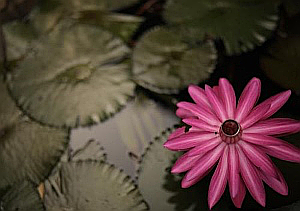

In [ ]:
sharpness_factor_image = TF.adjust_sharpness(image,sharpness_factor=4.2)
sharpness_factor_image

**affine**

Apply affine transformation on the image keeping image center invariant. 

`angle` (number) – rotation angle in degrees between -180 and 180, clockwise direction.

`translate` (sequence of python:integers) – horizontal and vertical translations (post-rotation translation)

`scale` (float) – overall scale

`shear` (float or sequence) – shear angle value in degrees between -180 to 180, clockwise direction. If a sequence is specified, the first value corresponds to a shear parallel to the x-axis, while the second value corresponds to a shear parallel to the y-axis.

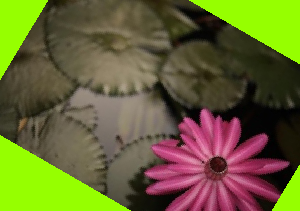

In [ ]:
affine_image = TF.affine(image, angle= 30, translate=(10,0), shear= 1, scale= 1, fill=(150,255,0))
affine_image